In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#import dataset #mô tả dataset 
data=pd.read_csv('Life Expectancy Data.csv')
data.head(10)
number_of_rows=data.shape[0]
number_of_columns=data.shape[1]
data_types = data.dtypes
missing_values = data.isnull().sum().sum()
descriptive_statistics = data.describe()
basic_structure = {
    "Number of rows": number_of_rows,
    "Number of columns":number_of_columns,
    "Data Types": data_types,
    "Total Missing Values": missing_values,
    "Descriptive Statistics":descriptive_statistics
}
basic_structure

{'Number of rows': 2938,
 'Number of columns': 22,
 'Data Types': Country                             object
 Year                                 int64
 Status                              object
 Life expectancy                    float64
 Adult Mortality                    float64
 infant deaths                        int64
 Alcohol                            float64
 percentage expenditure             float64
 Hepatitis B                        float64
 Measles                              int64
  BMI                               float64
 under-five deaths                    int64
 Polio                              float64
 Total expenditure                  float64
 Diphtheria                         float64
  HIV/AIDS                          float64
 GDP                                float64
 Population                         float64
  thinness  1-19 years              float64
  thinness 5-9 years                float64
 Income composition of resources    float64
 Schooling 

In [3]:
#Quan sát dữ liệu thiếu (missing data)
missingvalues = data.isnull().sum()
missingvalues

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [4]:
#xử lý giữ liệu bị thiếu.
missing_values = data.isnull().sum()
missing_values
for i in data.select_dtypes(include=['float64','int64']).columns:
    data[i].fillna(data[i].median(),inplace=True)

    #kiểm tra lại dữ liệu:
missing_values = data.isnull().sum()
missing_values


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

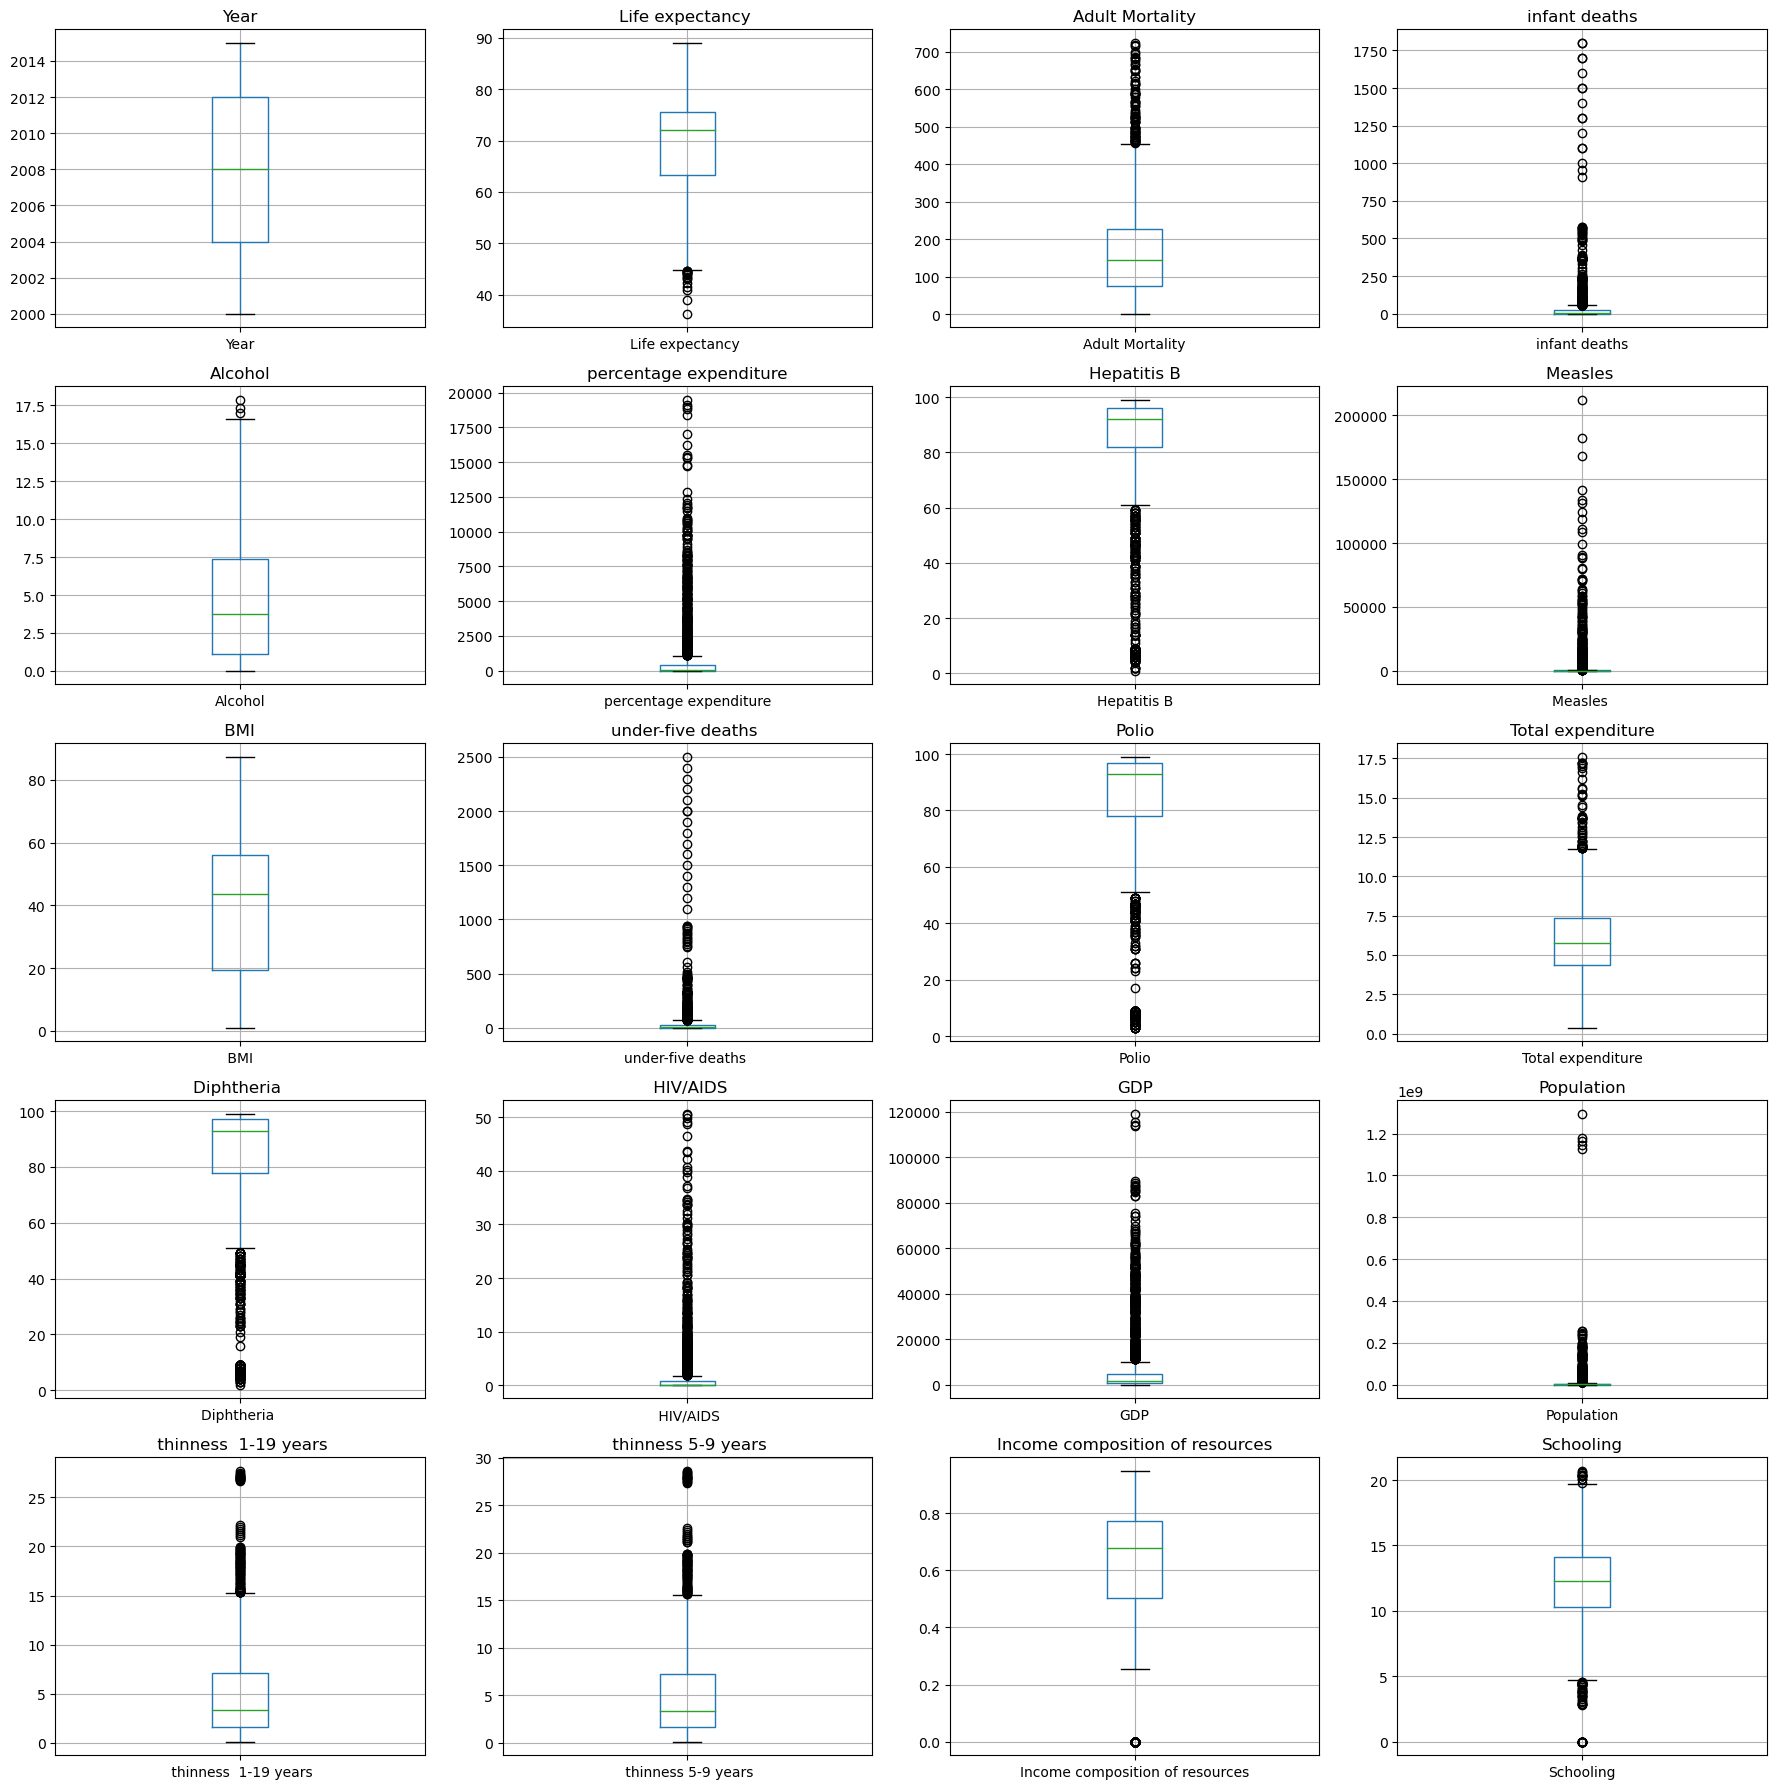

In [5]:
#Nhận diện phần tử biên 
import matplotlib.pyplot as plt 

numerical_columns = data.select_dtypes(include=['float64','int64']).columns

plt.figure(figsize=(18, 18))  

num_rows = 5
num_cols = 4

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)  
    data.boxplot(col)
    plt.title(col)

plt.tight_layout()
plt.show()


In [6]:
#giảm thiểu dữ liệu nhiễu 

def xac_dinh_moc(col):
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    up = Q3 + 1.5 * IQR
    return low, up
for i in data.select_dtypes(include=['float64','int64']):
    low,up=xac_dinh_moc(data[i])
    data[i]=np.where(data[i]<low,low,data[i])
    data[i]=np.where(data[i]>up,up,data[i])

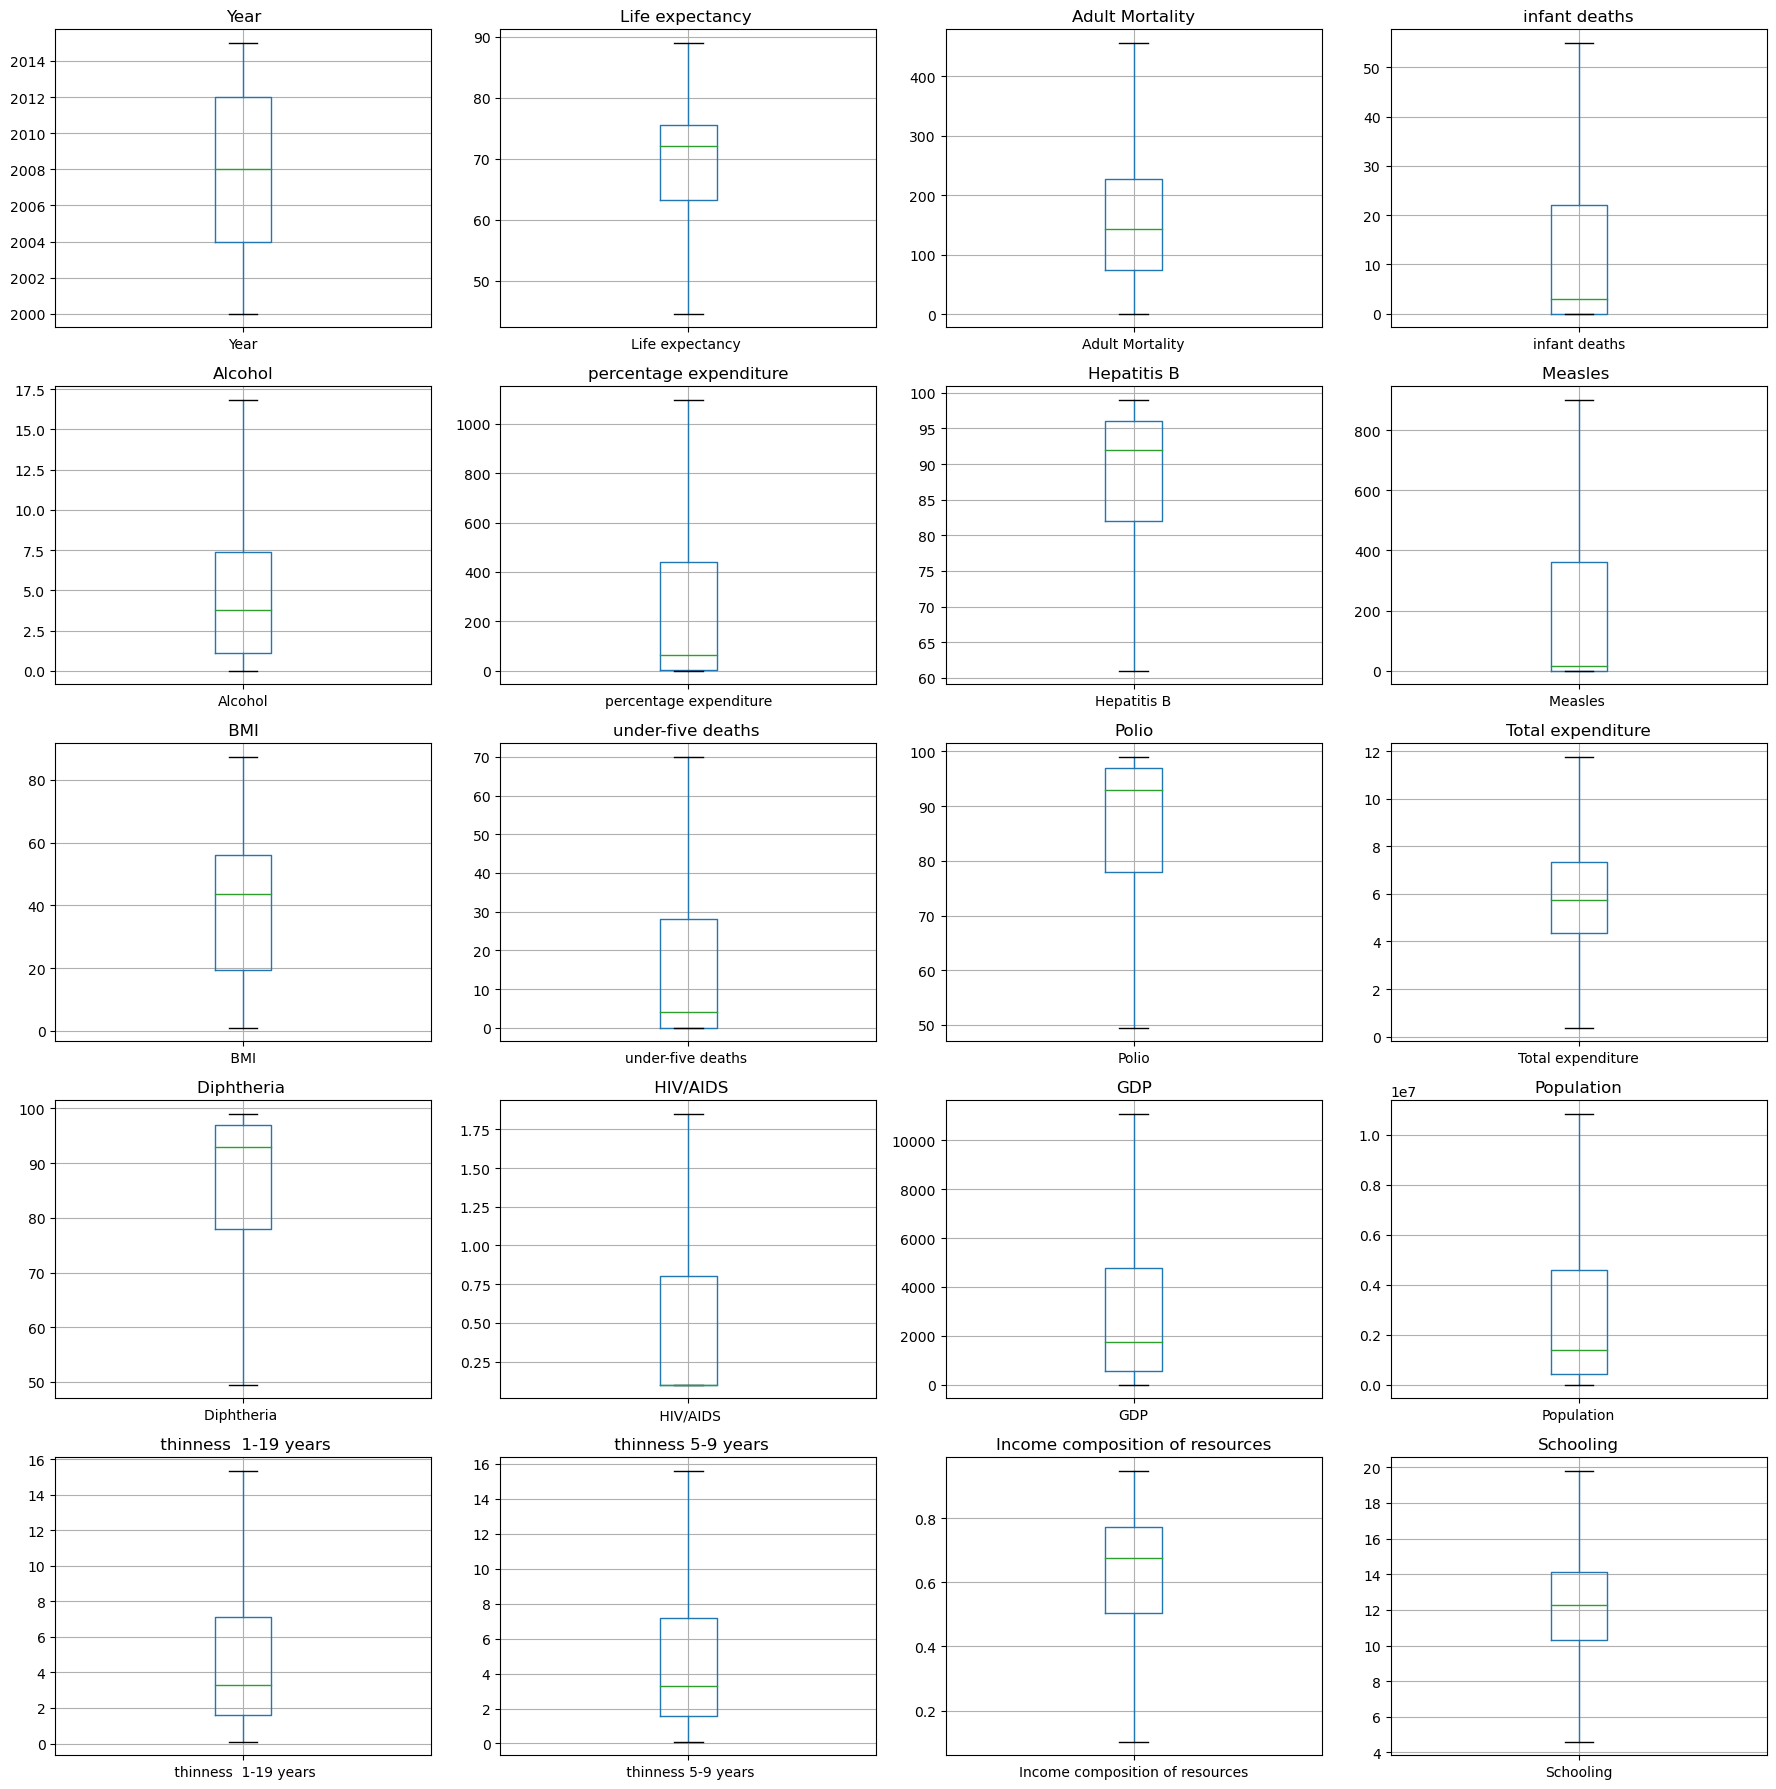

In [7]:
#kết quả sau khi giảm thiểu nhiễu 
import matplotlib.pyplot as plt 

numerical_columns = data.select_dtypes(include=['float64','int64']).columns

plt.figure(figsize=(18, 18))  

num_rows = 5
num_cols = 4

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)  
    data.boxplot(col)
    plt.title(col)

plt.tight_layout()
plt.show()


In [8]:
#xử lý dữ liệu không nhất quán 
for i in data.columns:
    print(data[i].value_counts())
    

Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64
Year
2013.0    193
2015.0    183
2014.0    183
2012.0    183
2011.0    183
2010.0    183
2009.0    183
2008.0    183
2007.0    183
2006.0    183
2005.0    183
2004.0    183
2003.0    183
2002.0    183
2001.0    183
2000.0    183
Name: count, dtype: int64
Status
Developing    2426
Developed      512
Name: count, dtype: int64
Life expectancy 
73.0    45
75.0    33
78.0    31
73.6    28
76.0    25
        ..
46.5     1
46.3     1
49.1     1
83.3     1
45.4     1
Name: count, Length: 350, dtype: int64
Adult Mortality
456.5    86
12.0     34
144.0    32
14.0     30
16.0     29
         ..
453.0     1
436.0     1
427.0     1
358.0     1
399.0 

In [9]:
#encoding of data (mã hóa nhãn của các dữ liệu phân loại)
pd.get_dummies(data=data,columns=["Country","Status"],drop_first=True)


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015.0,65.0,263.0,55.0,0.01,71.279624,65.0,900.625,19.1,70.0,...,False,False,False,False,False,False,False,False,False,True
1,2014.0,59.9,271.0,55.0,0.01,73.523582,62.0,492.000,18.6,70.0,...,False,False,False,False,False,False,False,False,False,True
2,2013.0,59.9,268.0,55.0,0.01,73.219243,64.0,430.000,18.1,70.0,...,False,False,False,False,False,False,False,False,False,True
3,2012.0,59.5,272.0,55.0,0.01,78.184215,67.0,900.625,17.6,70.0,...,False,False,False,False,False,False,False,False,False,True
4,2011.0,59.2,275.0,55.0,0.01,7.097109,68.0,900.625,17.2,70.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004.0,44.6,456.5,27.0,4.36,0.000000,68.0,31.000,27.1,42.0,...,False,False,False,False,False,False,False,False,True,True
2934,2003.0,44.6,456.5,26.0,4.06,0.000000,61.0,900.625,26.7,41.0,...,False,False,False,False,False,False,False,False,True,True
2935,2002.0,44.8,73.0,25.0,4.43,0.000000,73.0,304.000,26.3,40.0,...,False,False,False,False,False,False,False,False,True,True
2936,2001.0,45.3,456.5,25.0,1.72,0.000000,76.0,529.000,25.9,39.0,...,False,False,False,False,False,False,False,False,True,True


In [10]:
#normalization - chuẩn hóa 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
numerical_cols= data.select_dtypes(include='number').columns.drop('Year')
data_numerical=data[numerical_cols]
scaled_data=scaler.fit_transform(data_numerical)
data_scaled=pd.DataFrame(scaled_data, columns=numerical_cols)
data_scaled['Year']=data['Year']
data_scaled.head()


,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Year
0,-0.447767,0.875099,2.165057,-1.157385,-0.546410,-1.788340,1.886225,-0.967349,2.065644,-2.268402,0.991344,-1.285904,-0.629209,-0.756835,1.996219,2.711459,2.740246,-0.812827,-0.632374,2015.0
1,-0.985771,0.944382,2.165057,-1.157385,-0.540647,-2.032107,0.730456,-0.992434,2.065644,-1.730664,1.000080,-1.475921,-0.629209,-0.749306,-0.741659,2.711459,2.740246,-0.828468,-0.664624,2014.0
2,-0.985771,0.918400,2.165057,-1.157385,-0.541429,-1.869596,0.555093,-1.017519,2.065644,-1.477611,0.978240,-1.349243,-0.629209,-0.744263,1.996219,2.711459,2.740246,-0.859750,-0.696875,2013.0
3,-1.027968,0.953042,2.165057,-1.157385,-0.528678,-1.625829,1.886225,-1.042605,2.065644,-1.161295,1.148594,-1.159226,-0.629209,-0.734146,0.136491,2.711459,2.740246,-0.896245,-0.729125,2012.0
4,-1.059615,0.979023,2.165057,-1.157385,-0.711239,-1.544574,1.886225,-1.062673,2.065644,-1.098031,0.864671,-1.095887,-0.629209,-0.894692,-0.050733,2.711459,2.740246,-0.943168,-0.825876,2011.0


In [11]:
#binning 

import pandas as pd

# Bước 1: Xác định giá trị tối thiểu và tối đa của cột "Life expectancy"
tuoi_thap_nhat = data['Life expectancy '].min()
tuoi_cao_nhat = data['Life expectancy '].max()

# Bước 2: Xác định các biến khác
tuoi_trung_binh = data['Life expectancy '].mean()
do_lech_chuan = data['Life expectancy '].std()

# Bước 3: Xác định các cạnh của khoảng cho phân loại
canh_khoang = [
    tuoi_thap_nhat,
    tuoi_trung_binh - do_lech_chuan,
    tuoi_trung_binh,
    tuoi_trung_binh + do_lech_chuan,
    tuoi_cao_nhat
]

# Bước 4: Gán nhãn cho các khoảng phân loại
label_khoang = ["Thấp", "Dưới_trung_bình", "Trung_bình", "Trên_trung_bình"]

# Bước 5: Sử dụng hàm cut để tạo danh mục dựa trên khoảng
data["Life_expectancy_phan_loai"] = pd.cut(
    data["Life expectancy "],
    bins=canh_khoang,
    labels=label_khoang,
    include_lowest=True
)

# Bước 6: Hiển thị phân phối của các cột đã phân loại theo khoảng đã chia
phan_phoi = data["Life_expectancy_phan_loai"].value_counts()

# Bước 7: Hiển thị danh sách dữ liệu được cập nhật
du_lieu_duoc_cap_nhat = data[["Life expectancy ", "Life_expectancy_phan_loai"]].head()
print(phan_phoi,
      du_lieu_duoc_cap_nhat)

Life_expectancy_phan_loai
Trung_bình         1306
Dưới_trung_bình     657
Thấp                575
Trên_trung_bình     400
Name: count, dtype: int64    Life expectancy  Life_expectancy_phan_loai
0              65.0           Dưới_trung_bình
1              59.9           Dưới_trung_bình
2              59.9           Dưới_trung_bình
3              59.5                      Thấp
4              59.2                      Thấp
